In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("app.csv")
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [7]:
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = df['Installs'].astype(int)

In [8]:
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].astype(float)

In [9]:
df['Size'] = df['Size'].str.replace('M', '', regex=False)
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].astype(float)

AttributeError: Can only use .str accessor with string values!

In [10]:
# Convert to string
df['Size'] = df['Size'].astype(str)

# Replace 'Varies with device' with NaN
df['Size'] = df['Size'].replace('Varies with device', np.nan)

# Convert KB to MB
df['Size'] = df['Size'].apply(lambda x: 
                               float(x.replace('M','')) if 'M' in x 
                               else float(x.replace('k',''))/1024 if 'k' in x 
                               else np.nan)

# Check result
df['Size'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Size, dtype: float64

In [11]:
df['Size'].dtype

dtype('float64')

In [12]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            0 non-null      float64
 6   Installs        9659 non-null   int64  
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.0+ MB


Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              9659
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [13]:
df['Size'].fillna(df['Size'].median(), inplace=True)

C:\Users\anith\AppData\Local\Temp\ipykernel_16920\2076843222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size'].fillna(df['Size'].median(), inplace=True)


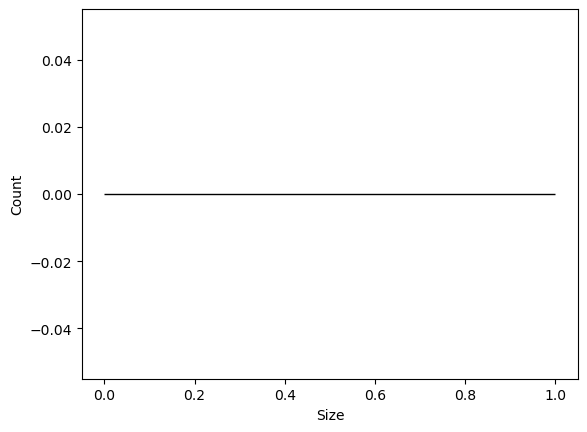

In [14]:
sns.histplot(df['Size'])
plt.show()

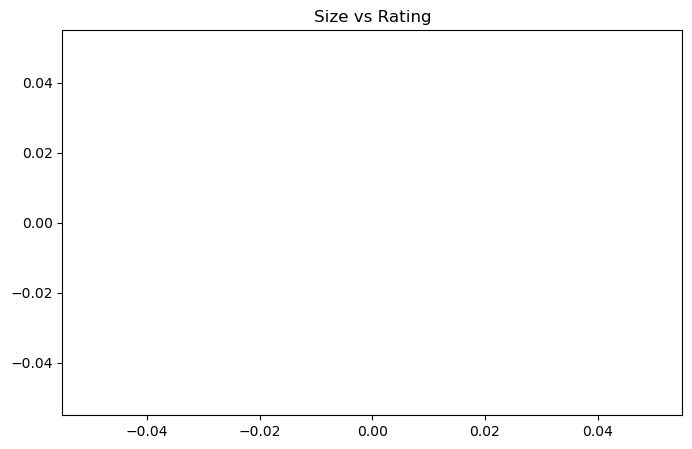

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size', y='Rating', data=df)
plt.title("Size vs Rating")
plt.show()

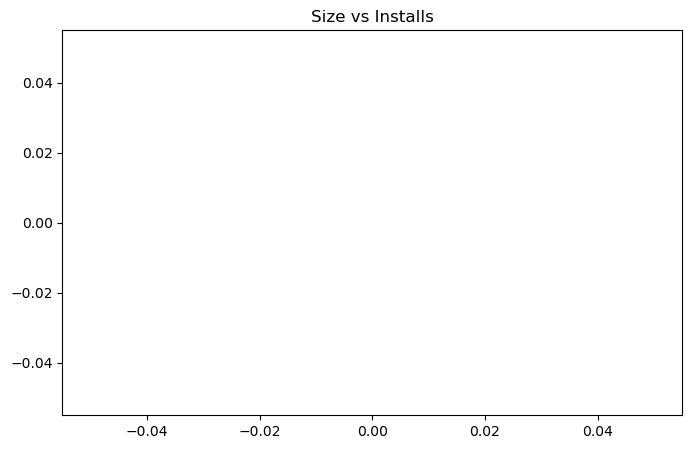

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size', y='Installs', data=df)
plt.title("Size vs Installs")
plt.show()

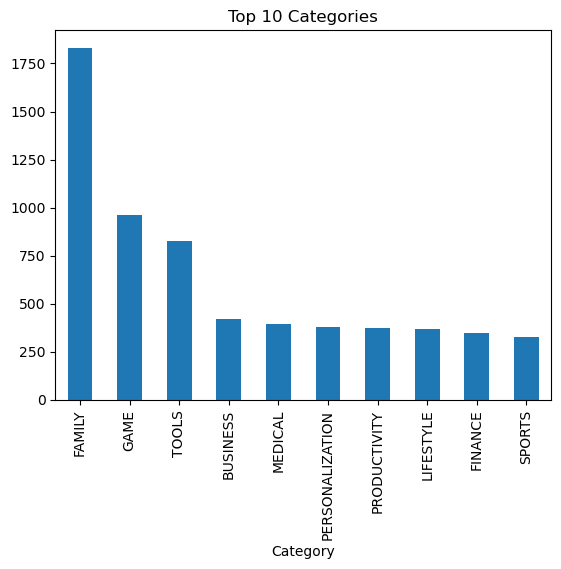

In [18]:
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Categories")
plt.show()

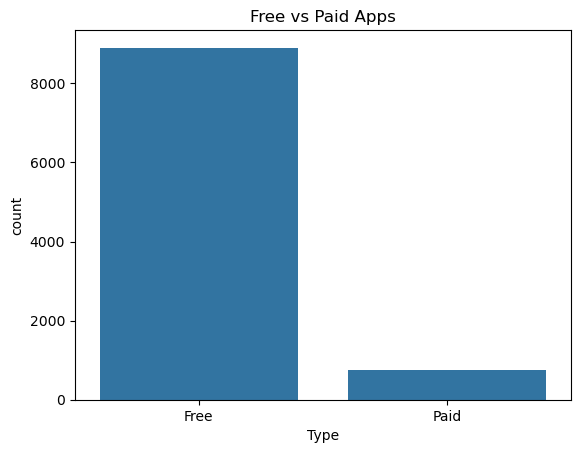

In [19]:
sns.countplot(x='Type', data=df)
plt.title("Free vs Paid Apps")
plt.show()

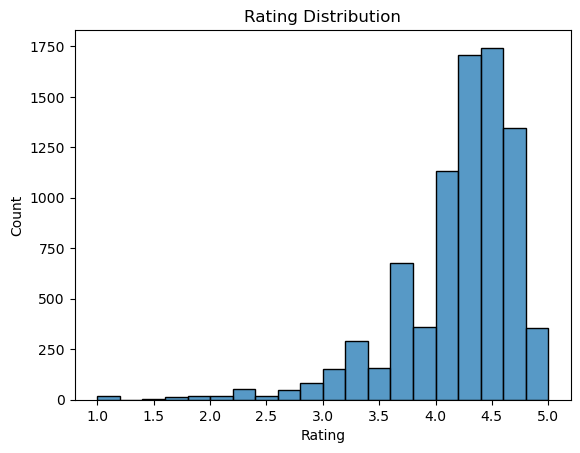

In [20]:
sns.histplot(df['Rating'], bins=20)
plt.title("Rating Distribution")
plt.show()

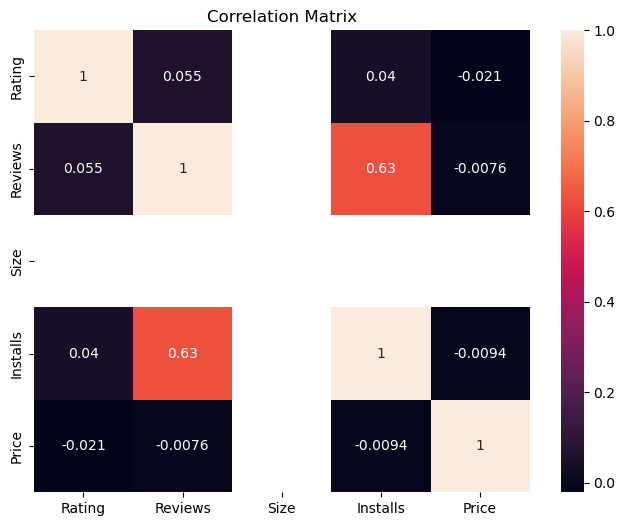

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Rating','Reviews','Size','Installs','Price']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [22]:
top_apps = df.sort_values(by='Installs', ascending=False).head(10)
top_apps[['App','Category','Installs']]

,App,Category,Installs
2977,Google News,NEWS_AND_MAGAZINES,1000000000
2012,Google+,SOCIAL,1000000000
1356,Subway Surfers,GAME,1000000000
152,Google Play Books,BOOKS_AND_REFERENCE,1000000000
2908,YouTube,VIDEO_PLAYERS,1000000000
2003,Instagram,SOCIAL,1000000000
2930,Google Play Movies & TV,VIDEO_PLAYERS,1000000000
2191,Google Photos,PHOTOGRAPHY,1000000000
2429,Google Street View,TRAVEL_AND_LOCAL,1000000000
701,Google Play Games,ENTERTAINMENT,1000000000


# Objective of the Project
# Unveiling the Android App Market: Analyzing Google Play Store Data

This project aims to:

1.Clean and preprocess the dataset by handling missing values, duplicates, and inconsistent data formats.

2.Analyze app categories to identify the most popular and dominant categories.

3.Compare Free and Paid applications in terms of count, installs, and pricing.

4.Study rating distribution to understand overall app quality trends.

5.Examine relationships between key features such as Rating, Reviews, Installs, Size, and Price.

6.Identify top-performing apps based on installs and user engagement.

7.Generate meaningful insights that help understand user behavior and market competition in the Google Play Store.